In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
#removing id as it does not impact the model
df.drop('id', axis =1, inplace =True)

In [4]:
#checking number of rows and columns of the given dataset
df.shape

(159571, 7)

In [5]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [6]:
#Lets check the value counts of each of the column
print('malignant\n',df['malignant'].value_counts())
print(df['highly_malignant'].value_counts())
print(df['rude'].value_counts())
print(df['threat'].value_counts())
print(df['abuse'].value_counts())
print(df['loathe'].value_counts())

malignant
 0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


In [7]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Checking for null values in the dataset
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

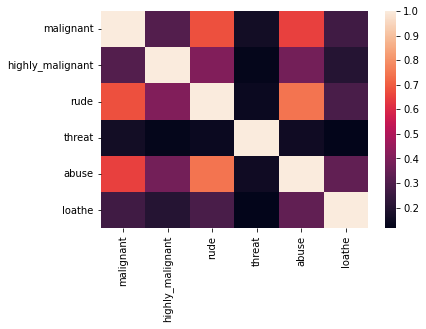

In [11]:
corr =  df.corr()
sns.heatmap(corr)

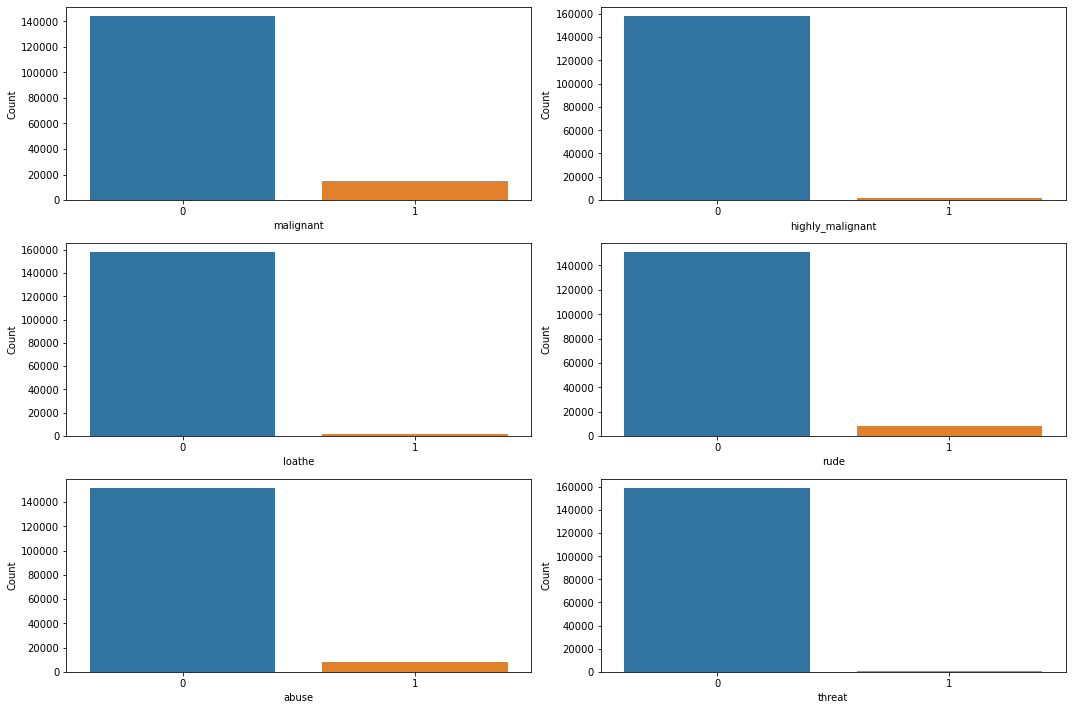

In [21]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']

plt.figure(figsize=[15,10])
plotnumber = 1

for i in col:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Count', fontsize= 10)
    plotnumber+=1
plt.tight_layout()

In [6]:
#grouping
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df['Type'] =df[cols_target].sum(axis =1)
print(df['Type'].value_counts())
df['Type'] = df['Type'] > 0 
df['Type'] = df['Type'].astype(int)
print(df['Type'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: Type, dtype: int64
0    143346
1     16225
Name: Type, dtype: int64


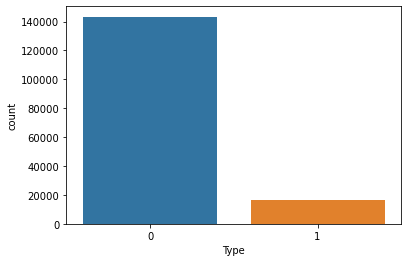

In [10]:
sns.countplot(x="Type" , data = df)
plt.show()

In [7]:
import nltk

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [48]:
df['tokenized_text'] = df['comment_text'].apply(word_tokenize)

In [49]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Type,tokenized_text,Lemmatized_Text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,"[Explanation, Why, the, edits, made, under, my...","E, x, p, l, n, n, ,, , W, h, ,, , h, e, ,, ..."
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,"[D'aww, !, He, matches, this, background, colo...","D, ', w, w, ,, , ,, , H, e, ,, , c, h, e, ,..."
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"[Hey, man, ,, I, 'm, really, not, trying, to, ...","H, e, ,, , n, ,, , ,, ,, , I, ,, , ', ,, ..."
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,"[``, More, I, ca, n't, make, any, real, sugges...","`, `, ,, , M, r, e, ,, , I, ,, , c, ,, , n..."
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"[You, ,, sir, ,, are, my, hero, ., Any, chance...","Y, ,, , ,, ,, , r, ,, , ,, ,, , r, e, ,, ..."


In [13]:
lem = WordNetLemmatizer()

In [20]:
new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','!','@','#','$','%','^','&','*','(',')'])

In [21]:
def lemmatize_text(text):
    return [lem.lemmatize(w) for w in text if w not in new_stopwords_list]

In [50]:
df['Lemmatized_Text'] = df['tokenized_text'].apply(lemmatize_text).apply(', '.join)

In [51]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Type,tokenized_text,Lemmatized_Text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,"[Explanation, Why, the, edits, made, under, my...","Explanation, Why, edits, made, username, Hardc..."
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,"[D'aww, !, He, matches, this, background, colo...","D'aww, He, match, background, colour, I, 'm, s..."
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"[Hey, man, ,, I, 'm, really, not, trying, to, ...","Hey, man, ,, I, 'm, really, trying, edit, war,..."
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,"[``, More, I, ca, n't, make, any, real, sugges...","``, More, I, ca, n't, make, real, suggestion, ..."
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"[You, ,, sir, ,, are, my, hero, ., Any, chance...","You, ,, sir, ,, hero, ., Any, chance, remember..."


In [52]:
df['Lemmatized_Text'] = df['Lemmatized_Text'].str.lower()
df['Lemmatized_Text'] = df['Lemmatized_Text'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
df['Lemmatized_Text'] = df['Lemmatized_Text'].apply(lambda x: re.sub(r"\d+", "", x))
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Type,tokenized_text,Lemmatized_Text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,"[Explanation, Why, the, edits, made, under, my...",explanation why edits made username hardcore m...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,"[D'aww, !, He, matches, this, background, colo...",daww he match background colour i m seemingly ...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"[Hey, man, ,, I, 'm, really, not, trying, to, ...",hey man i m really trying edit war it s guy ...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,"[``, More, I, ca, n't, make, any, real, sugges...",more i ca nt make real suggestion improvement...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"[You, ,, sir, ,, are, my, hero, ., Any, chance...",you sir hero any chance remember page s


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
cv = TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1),
    max_features=100000)

# Use the content column instead of our single text variable
x = cv.fit_transform(df['Lemmatized_Text'])
x.shape

(159571, 100000)

In [57]:
y = df['Type']

In [77]:
x.shape

(159571, 100000)

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 100)

In [96]:
mnb = MultinomialNB()

In [79]:
#Training model using Naive bayes Classifier

from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB().fit(x_train,y_train)
nb_ypred = nb_model.predict(x_test)

In [80]:
#Confusion Matrix for Naive Byes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,nb_ypred))

[[35805    17]
 [ 2975  1096]]


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [86]:
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,nb_ypred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,nb_ypred))
print('\n---ROC AUC SCORE---\n\n',roc_auc_score(y_test,nb_ypred))

---Accuracy Score for Naive Byes---

 0.9249993733236408

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35822
           1       0.98      0.27      0.42      4071

    accuracy                           0.92     39893
   macro avg       0.95      0.63      0.69     39893
weighted avg       0.93      0.92      0.91     39893


---ROC AUC SCORE---

 0.63437337642091


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [88]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [89]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
xgb.fit(x_train,y_train)

print("All Models Trained")

[16:27:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
All Models Trained


In [90]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
xgb.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [91]:
#Accuracy score
print('Logistic Regression =', accuracy_score(y_test,lr.predict(x_test)))
print('Decision Tree =', accuracy_score(y_test,dt.predict(x_test)))
print('Random Forest =', accuracy_score(y_test,rf.predict(x_test)))
print('Xtreme Gradient Boost =', accuracy_score(y_test,xgb.predict(x_test)))

Logistic Regression = 0.9536510164690547
Decision Tree = 0.9406662823051664
Random Forest = 0.9532248765447572
Xtreme Gradient Boost = 0.9517459203369012


In [92]:
#Lets check the roc_auc_score of every model

print('Logistic Regression =', roc_auc_score(y_test,lr.predict(x_test)))
print('Decision Tree =', roc_auc_score(y_test,dt.predict(x_test)))
print('Random Forest =', roc_auc_score(y_test,rf.predict(x_test)))
print('Xtreme Gradient Boost =', roc_auc_score(y_test,xgb.predict(x_test)))

Logistic Regression = 0.7919567774454441
Decision Tree = 0.829795469509501
Random Forest = 0.7979246295457352
Xtreme Gradient Boost = 0.7871946673583149


In [93]:
#Classification Report

print('Classification report of Logistic Regression \n', classification_report(y_test,lr.predict(x_test)))
print('Classification report of Decision Tree \n', classification_report(y_test,dt.predict(x_test)))
print('Classification report of Random Forest \n', classification_report(y_test,rf.predict(x_test)))
print('Classification report of Xtreme Gradient Boost \n', classification_report(y_test,xgb.predict(x_test)))

Classification report of Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      1.00      0.97     35822
           1       0.93      0.59      0.72      4071

    accuracy                           0.95     39893
   macro avg       0.94      0.79      0.85     39893
weighted avg       0.95      0.95      0.95     39893

Classification report of Decision Tree 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     35822
           1       0.72      0.69      0.70      4071

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.84     39893
weighted avg       0.94      0.94      0.94     39893

Classification report of Random Forest 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     35822
           1       0.91      0.60      0.72      4071

    accuracy                           0.95     39893

In [94]:
print('Confusion Matrix of Logistic Regression\n', confusion_matrix(y_test,lr.predict(x_test)))
print('Confusion Matrix of Decision Tree\n', confusion_matrix(y_test,dt.predict(x_test)))
print('Confusion Matrix of Random Forest \n', confusion_matrix(y_test,rf.predict(x_test)))
print('Confusion Matrix of Xtreme Gradient Boost \n', confusion_matrix(y_test,xgb.predict(x_test)))

Confusion Matrix of Logistic Regression
 [[35647   175]
 [ 1674  2397]]
Confusion Matrix of Decision Tree
 [[34715  1107]
 [ 1260  2811]]
Confusion Matrix of Random Forest 
 [[35573   249]
 [ 1617  2454]]
Confusion Matrix of Xtreme Gradient Boost 
 [[35605   217]
 [ 1708  2363]]


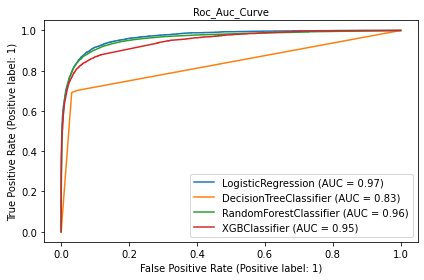

In [98]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(xgb,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

In [ ]:
# After checking all the parameters we can see that LogisticRegression is giving us the best predictions for this dataset.

In [99]:
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning**

In [100]:
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'C':[1.0,2.0],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter':[100,110],
         }

In [101]:
grid = GridSearchCV(lr, param_grid= params, cv = 2, n_jobs=-1)

In [102]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'max_iter': [100, 110],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [104]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'C': 2.0, 'max_iter': 110, 'penalty': 'l1', 'solver': 'liblinear'}


In [105]:
clf= grid.best_estimator_

In [106]:
clf.fit(x_train, y_train)

LogisticRegression(C=2.0, max_iter=110, penalty='l1', solver='liblinear')

In [107]:
y_pred =  clf.predict(x_test)

In [108]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('ROC_AUC Score=',roc_auc_score(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.9587646955606247
Confusion Matrix
 [[35446   376]
 [ 1269  2802]]
ROC_AUC Score= 0.8388933170630334
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     35822
           1       0.88      0.69      0.77      4071

    accuracy                           0.96     39893
   macro avg       0.92      0.84      0.88     39893
weighted avg       0.96      0.96      0.96     39893



In [112]:
#Cross Validating.

from sklearn.model_selection import cross_val_score

cvs_lr = cross_val_score(clf,x,y,cv=4)

cvs_lr.mean()

0.9597357886409617

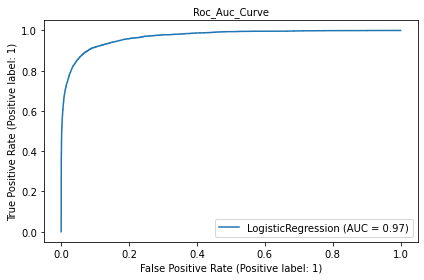

In [113]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()